In [1]:
from astropy.time import Time
from astropy.coordinates import solar_system_ephemeris, EarthLocation
from astropy.coordinates import get_body_barycentric, get_body, get_moon
from astropy import units as u  
from astropy import constants as const #import constants
from astropy.coordinates import SkyCoord
from astropy.coordinates import ICRS
from astropy.coordinates import Angle
import ligo.skymap.plot


import pandas as pd
import numpy as np

import matplotlib
import matplotlib.pyplot as plt

from moviepy.video.io.bindings import mplfig_to_npimage#动图生成
import moviepy.editor as mpy

In [2]:
orbitDataTAIJI  =  pd.read_csv('orbitDataTAIJI.dat', index_col = 0)  #读取csv文件
orbitData      =  orbitDataTAIJI.loc[0:366,:]
timeVec = orbitData['timeJD']
timeVecJD = Time(timeVec, format='jd', scale='tcg')  #tcb : Barycentric Coordinate Time (TCB)
timeVecISO = Time(timeVecJD, format='iso')
loc = EarthLocation.of_site('greenwich') 

In [3]:

# with solar_system_ephemeris.set('de430'): 
with solar_system_ephemeris.set('builtin'):
    sun = get_body('sun', timeVecISO, loc) 
    venus = get_body('venus', timeVecISO, loc)     
    earth = get_body('earth', timeVecISO, loc)     
    jup = get_body('jupiter', timeVecISO, loc)     
    moon = get_body('moon', timeVecISO, loc)         

# get_moon(t, loc) 
# get_body_barycentric('moon', t) 

In [4]:
solar_system_ephemeris.bodies 

('earth',
 'sun',
 'moon',
 'mercury',
 'venus',
 'earth-moon-barycenter',
 'mars',
 'jupiter',
 'saturn',
 'uranus',
 'neptune')

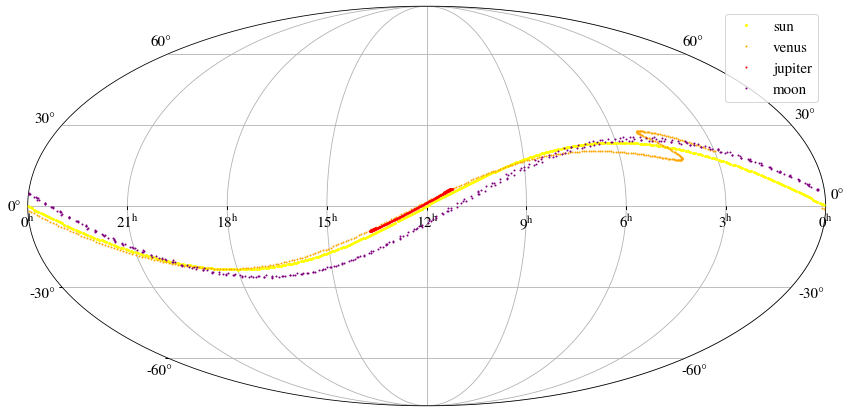

In [5]:
matplotlib.rcParams.update({'font.size': 15, 'font.family': 'STIXGeneral', 'mathtext.fontset': 'stix'})
# 绘图


fig = plt.figure(figsize=(12,6))
ax = plt.axes(projection='astro hours mollweide')

ax.plot_coord(sun,'o',c='yellow',markersize=2, label = 'sun')
ax.plot_coord(venus,'o',c='orange',markersize=1, label = 'venus')
ax.plot_coord(jup,'o',c='red',markersize=1, label = 'jupiter')
# ax.plot_coord(earth,'o',c='blue',markersize=1, label = 'earth')
ax.plot_coord(moon,'o',c='purple',markersize=1, label = 'moon')

ax.grid(ax)
plt.legend()
plt.tight_layout()
plt.show()

t:   0%|          | 0/300 [00:00<?, ?it/s, now=None]

Moviepy - Building video __temp__.mp4.
Moviepy - Writing video __temp__.mp4



Moviepy - Done !
Moviepy - video ready __temp__.mp4


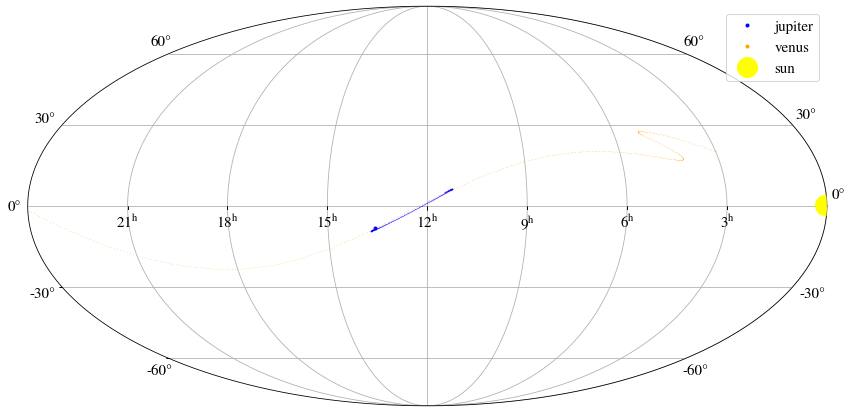

In [6]:
# #绘动图3d2#$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$
matplotlib.rcParams.update({'font.size': 15, 'font.family': 'STIXGeneral', 'mathtext.fontset': 'stix'})
# 绘图

duration = 10 #总共的时间       figsize代表横纵比
speed = 1.0#播放速率    
number = len(sun)

# plt.style.use('dark_background')


fig_mpl = plt.figure(figsize=(12,6))

# 使用MOVIEPY让图动起来(根据时间t来更新图). 保存为GIF.
def make_frame_mpl(t):
    tNorm = t/duration      #0 --> 1
    index = int(number*(t/duration))  #0 --> number
  
    ax = fig_mpl.add_subplot(111, projection='astro hours mollweide')
    ax.remove() #ax.clear不管用,会将整个ax框架清除，而不是只把图像清除
    ax = fig_mpl.add_subplot(111, projection='astro hours mollweide')


    
#     #moon
#     ax.plot_coord(moon[index],'o',c='orange',markersize=18, label = 'moon')   
    
    #jup
    ax.plot_coord(jup[index],'o',c='blue',markersize=3, label = 'jupiter')   
    ax.plot_coord(jup[0:(index + 1)],'o', markersize=0.1, c='blue') 

    #venus
    ax.plot_coord(venus[index],'o',c='orange',markersize=3, label = 'venus')   
    ax.plot_coord(venus[0:(index + 1)],'o', markersize=0.1, c='orange') 
    
    #sun, 最后画，遮盖星星
    ax.plot_coord(sun[index],'o',c='yellow',markersize=20, label = 'sun')
    
    ax.grid(ax)
    plt.legend()
    plt.tight_layout()
    return mplfig_to_npimage(fig_mpl) # RGB image of the figure

animation =mpy.VideoClip(make_frame_mpl, duration=duration)
# animation.speedx(speed).write_videofile("taiji_orbit.mp4", fps=30) #输出mp4, speedx表示播放速度(1.0为正常速度), fps每秒帧数
#animation.speedx(speed).write_gif("TAIJI&LISA.gif", fps=30) #输出mp4, speedx表示播放速度(1.0为正常速度), fps每秒帧数
animation.speedx(speed).ipython_display(fps=30, loop=1, autoplay=0)